In [66]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/figaro-code"
exp_names = ["figaro", "mkl"]
exp_paths = {"figaro": "comparisons/performance/figaro", "mkl": "comparisons/performance/python/numpy"}
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]

start_per = 10
end_per = 100
per_inc = 10

num_measurement = 5

xlsx_name = "time.xlsx"

df_measurement_exps = {}
for exp_name in exp_names: 
    exp_path = exp_paths[exp_name]
    perf_path = os.path.join(path_src, exp_path)
    df_measurement = pd.DataFrame(columns=db_names)

    for db_name in db_names:
        #gather_times_path = os.path.join(perf_path, db_name + xlsx_name)
        #print(gather_times_path)
        #out_workbook = Workbook()
        #out_workbook.remove(out_workbook.active)
        #out_sheet = out_workbook.create_sheet("Times")

        for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)): 
            db_name_per = "{}{}".format(db_name, percent)
            path_xlsx = os.path.join(perf_path, db_name_per, xlsx_name)
            workbook = load_workbook(filename=path_xlsx, data_only=True)
            sheet = workbook.active
            row_count = sheet.max_row
            col_idx = db_idx + 1
            col_letter = get_column_letter(col_idx)
            
            #out_sheet.cell(row=1, column=col_idx).value = db_name_per
            
            start_row_idx = 2
            np_measures = np.zeros(num_measurement)
            for row_idx_dst in range(start_row_idx, start_row_idx + num_measurement):
                offset_idx = row_idx_dst - start_row_idx
                row_idx_src = row_count - num_measurement  + offset_idx
                val = sheet.cell(row=row_idx_src, column=2).value
                np_measures[offset_idx] = float(val)
                #print(idx_shift, db_idx)
                #out_sheet.cell(row=row_idx_dst, column=col_idx).value = val
            
            #out_sheet.cell(row=start_row_idx + num_measurement, column=col_idx).value = '=AVERAGE({}{}:{}{})'.format(col_letter, start_row_idx + 1, 
            #        col_letter,6)

            time_avg = np.mean(np_measures[1:])
            df_measurement.at[percent, db_name] = time_avg
            
        #out_workbook.save(gather_times_path)
        print(df_measurement)
        df_measurement.index = df_measurement.index.set_names(['index'])
        df_measurement = df_measurement.astype(float)
    df_measurement_exps[exp_name] = df_measurement





    DBRetailer DBFavorita DBYelp
10     1.03018        NaN    NaN
20     1.96654        NaN    NaN
30     2.57732        NaN    NaN
40     3.51694        NaN    NaN
50     4.17763        NaN    NaN
60     5.13137        NaN    NaN
70     5.85991        NaN    NaN
80     7.16934        NaN    NaN
90     7.88178        NaN    NaN
100    10.0667        NaN    NaN
       DBRetailer  DBFavorita  DBYelp
index                                
10       1.030178    0.664646     NaN
20       1.966543    1.255434     NaN
30       2.577321    1.866773     NaN
40       3.516942    2.603960     NaN
50       4.177634    3.029856     NaN
60       5.131367    3.697231     NaN
70       5.859913    4.212076     NaN
80       7.169342    5.142701     NaN
90       7.881779    5.547543     NaN
100     10.066668    5.935815     NaN
       DBRetailer  DBFavorita    DBYelp
index                                  
10       1.030178    0.664646  0.144973
20       1.966543    1.255434  0.169142
30       2.577321    

In [67]:
import csv

db_name_map = {
    "DBFavorita": "exp1perf-favorita.dat", 
    "DBRetailer": "exp1perf-retailer.dat", 
    "DBYelp": "exp1perf-yelp.dat"
    }
exp_dat_names = ["#percentage of data", "figaro-time", "mkl-time"]

for db_name in db_names:
    dbs_results = []
    for exp_name in exp_names:
        dbs_results.append(df_measurement_exps[exp_name][db_name])
    df_db_results = pd.concat(dbs_results, axis=1)
    df_db_results = df_db_results.reset_index().rename(columns={df_db_results.index.name:'index'})
    df_db_results.columns = exp_dat_names
    df_db_results.to_csv(db_name_map[db_name], float_format='%.2f', sep='\t', index=False, quoting=csv.QUOTE_NONE,  escapechar=" ")

{'figaro':        DBRetailer  DBFavorita    DBYelp
index                                  
10       1.030178    0.664646  0.144973
20       1.966543    1.255434  0.169142
30       2.577321    1.866773  0.231181
40       3.516942    2.603960  0.261456
50       4.177634    3.029856  0.316293
60       5.131367    3.697231  0.319758
70       5.859913    4.212076  0.357337
80       7.169342    5.142701  0.414289
90       7.881779    5.547543  0.460543
100     10.066668    5.935815  0.455589, 'mkl':        DBRetailer  DBFavorita      DBYelp
index                                    
10       6.375022    7.184200   12.965929
20      12.416937   12.110202   25.507881
30      18.780769   18.172849   39.822688
40      24.657118   25.401152   50.605863
50      30.025866   32.359557   63.603578
60      36.234445   39.556888   74.758254
70      42.208672   47.743948   95.452387
80      46.354349   53.914072  113.633435
90      54.949117   58.157185  160.099810
100     59.509107   71.253263  171.0450

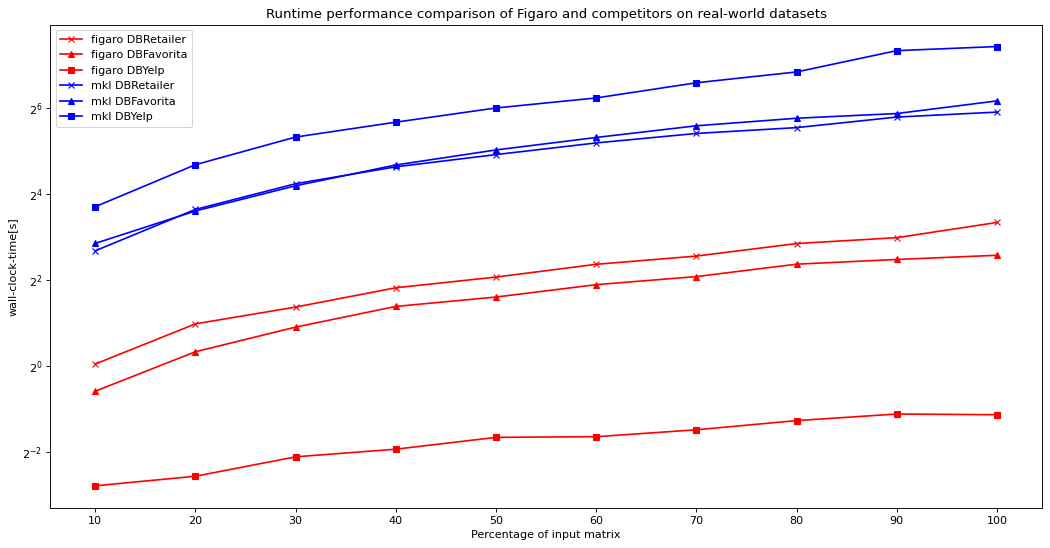

In [68]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of input matrix")
plt.ylabel("wall-clock-time[s]")

plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

plt.yscale('log', base=2)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_marker =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
exp_colour = {"figaro": "r", "mkl": "b"}

print(df_measurement_exps)
for exp_name in exp_names:
    print(exp_name)
    df_measurement = df_measurement_exps[exp_name]
    for db_name in df_measurement:
        print(df_measurement[db_name])
        plt.plot(df_measurement[db_name], "-" + exp_colour[exp_name] + db_marker[db_name], label="{} {}".format(exp_name, db_name))
plt.legend(loc="upper left")

plt.show()